# importing modules

In [67]:
import pandas as pd
import numpy as np
import random
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Reading data from csv file

In [68]:
data = pd.read_csv("data.csv")
data.head()

,url,label
0,diaryofagameaddict.com,bad
1,espdesign.com.au,bad
2,iamagameaddict.com,bad
3,kalantzis.net,bad
4,slightlyoffcenter.net,bad


 # Apply NLP to Analysing Data

In [69]:
# Labels
y = data["label"]
# Features
url_list = data["url"]

# Using Tokenizer

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(url_list)

# split into training and testing dataset 80:20 ratio

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building using logistic regression

In [72]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

LogisticRegression()

# Model Predect

In [73]:
train_pred = logit.predict( X_train)
train_pred


array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype=object)

In [74]:
test_pred = logit.predict( X_test)
test_pred

array(['good', 'good', 'good', ..., 'good', 'good', 'good'], dtype=object)

# Training Accuracy

In [76]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train, train_pred))

0.971846562277961


# Testing Accuracy

In [78]:
accuracy = logit.score(X_test, y_test)
print("Accuracy of our model is: ", accuracy)

Accuracy of our model is:  0.9645392601048839


# Model Evaluation

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# Predictions
y_pred = logit.predict(X_test)

# Classification Report

In [82]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

         bad       0.97      0.82      0.89     14964
        good       0.96      1.00      0.98     69129

    accuracy                           0.96     84093
   macro avg       0.97      0.91      0.94     84093
weighted avg       0.96      0.96      0.96     84093



# Confusion Matrix 

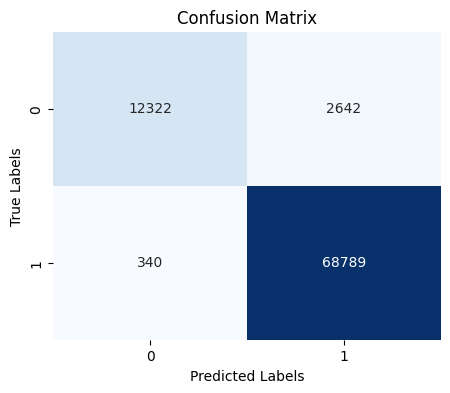

In [83]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Plot the training and testing accuracy using a bar chart

(0.0, 1.0)

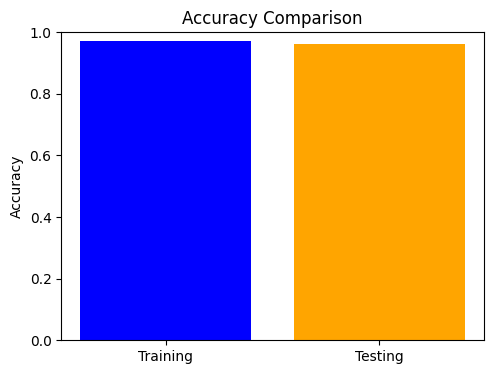

In [84]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.bar(['Training', 'Testing'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limit to 0 to 1



# Plot the training and testing accuracy using a pie chart

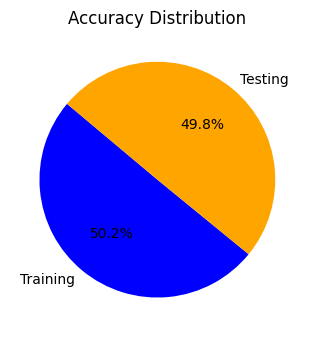

In [85]:
plt.subplot(1, 2, 2)
labels = ['Training', 'Testing']
sizes = [train_accuracy, test_accuracy]
colors = ['blue', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Distribution')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

# Roc curve

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


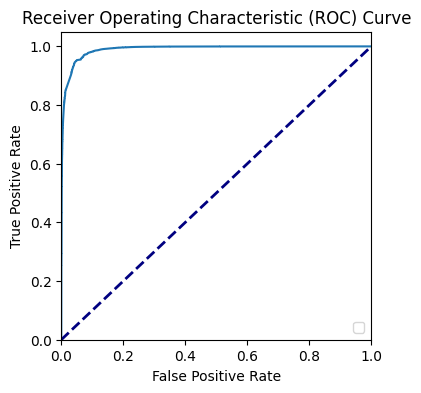

In [86]:
from sklearn.metrics import roc_curve, auc
probs = logit.predict_proba(X_test)
preds = probs[:, 1]
y_test_binary = y_test.replace({'good': 1, 'bad': 0})

fpr, tpr, thresholds = roc_curve(y_test_binary, preds)


roc_auc = auc(fpr, tpr)
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


# Training Model Save

In [ ]:
model.save()